## Import Requirements

In [105]:
import torch
import pandas as pd
import os
import random

from skimage import io, transform
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

## Making the training csv

In [41]:
fake_add = './Dataset/c23'
origin_add = './Dataset/c23/original'
forg_types = ['Deepfakes','Face2Face','FaceSwap','NeuralTextures']
add_csv = {'Add':[]}
for fold in os.listdir(origin_add):
    rnd_idx = random.sample(list(range(0,30)),3)
    for rnd in rnd_idx:
        add = os.path.join(origin_add, fold, str(rnd)+'.jpg')
        pic_adds = [add]*3
        forge = random.sample(forg_types, 1)[0]
        pic_adds.append(os.path.join(fake_add,forge,fold, str(rnd)+'.jpg'))
        imp_idx = random.sample(list(range(0,len(add_csv['Add'])+1 , 4)),1)[0]
        add_csv['Add'][imp_idx:imp_idx] = pic_adds
        print(add_csv)
        df = pd.DataFrame(add_csv)
        df.to_csv('train_add.csv', index = True)

        

    



{'Add': ['./Dataset/c23/original\\0\\16.jpg', './Dataset/c23/original\\0\\16.jpg', './Dataset/c23/original\\0\\16.jpg', './Dataset/c23\\NeuralTextures\\0\\16.jpg']}
{'Add': ['./Dataset/c23/original\\0\\23.jpg', './Dataset/c23/original\\0\\23.jpg', './Dataset/c23/original\\0\\23.jpg', './Dataset/c23\\NeuralTextures\\0\\23.jpg', './Dataset/c23/original\\0\\16.jpg', './Dataset/c23/original\\0\\16.jpg', './Dataset/c23/original\\0\\16.jpg', './Dataset/c23\\NeuralTextures\\0\\16.jpg']}
{'Add': ['./Dataset/c23/original\\0\\23.jpg', './Dataset/c23/original\\0\\23.jpg', './Dataset/c23/original\\0\\23.jpg', './Dataset/c23\\NeuralTextures\\0\\23.jpg', './Dataset/c23/original\\0\\3.jpg', './Dataset/c23/original\\0\\3.jpg', './Dataset/c23/original\\0\\3.jpg', './Dataset/c23\\Face2Face\\0\\3.jpg', './Dataset/c23/original\\0\\16.jpg', './Dataset/c23/original\\0\\16.jpg', './Dataset/c23/original\\0\\16.jpg', './Dataset/c23\\NeuralTextures\\0\\16.jpg']}


## Create DataSet and DataLoader

In [163]:
class FaceForensic():
    """Face Forensic Dataset."""
    def __init__(self, csv_file, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.face_add = pd.read_csv(csv_file)
        self.transform = transform
    
    def __len__(self):
        return len(self.face_add)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_add = self.face_add.iloc[idx, 1]
        image = Image.open(img_add)
        if self.transform:
            if idx % 4 in [0,3]: 
                image = self.transform['transform1'](image)
            elif idx % 4 == 1:
                image = self.transform['transform2'](image)
            else:
                image = self.transform['transform3'](image)

        return image


In [164]:
transform1 = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(),
                                  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

transform2 = transforms.Compose([transforms.RandomVerticalFlip(p=1),transforms.Resize((224,224)),transforms.ToTensor(),
                  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

trasnform3 = transforms.Compose([transforms.RandomHorizontalFlip(p=1),transforms.Resize((224,224)),transforms.ToTensor(),
                  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

trfms = {'transform1': transform1 ,'transform2': transform2, 'transform3': trasnform3 }
forensic_dataset = FaceForensic('train_add.csv', trfms)

In [165]:
len(forensic_dataset)

12

In [166]:
forensic_dataset[1]

tensor([[[ 1.9064,  1.9064,  1.9064,  ...,  0.7248,  0.1939, -0.0287],
         [ 1.9064,  1.9064,  1.8893,  ...,  0.6221,  0.1768, -0.0116],
         [ 1.8893,  1.8893,  1.8722,  ...,  0.4508,  0.1597,  0.0398],
         ...,
         [ 1.8037,  1.7865,  1.7523,  ...,  1.4269,  1.4440,  1.4612],
         [ 1.7865,  1.7865,  1.7694,  ...,  1.4954,  1.5125,  1.5297],
         [ 1.7865,  1.7865,  1.7694,  ...,  1.5468,  1.5639,  1.5810]],

        [[ 2.0434,  2.0434,  2.0434,  ...,  0.6429,  0.1176, -0.1099],
         [ 2.0434,  2.0434,  2.0434,  ...,  0.5203,  0.0826, -0.0924],
         [ 2.0609,  2.0609,  2.0434,  ...,  0.3277,  0.0301, -0.0749],
         ...,
         [ 1.9209,  1.9034,  1.8683,  ...,  1.5357,  1.5532,  1.5707],
         [ 1.9034,  1.9034,  1.8859,  ...,  1.6057,  1.6232,  1.6408],
         [ 1.9034,  1.9034,  1.8859,  ...,  1.6583,  1.6758,  1.6933]],

        [[ 2.2740,  2.2740,  2.2740,  ...,  0.8797,  0.3568,  0.1476],
         [ 2.2914,  2.2914,  2.2740,  ...,  0

In [167]:
dataloader = DataLoader(forensic_dataset, batch_size=4,
                        shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0
torch.Size([4, 3, 224, 224])
1
torch.Size([4, 3, 224, 224])
2
torch.Size([4, 3, 224, 224])


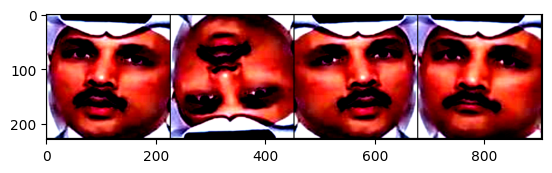

In [170]:
for i_batch, images_batch in enumerate(dataloader):
    print(i_batch)
    print(images_batch.size())
    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))